In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get data
data = pd.read_csv('D:/UoT_DSC/team_project/data/raw/Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


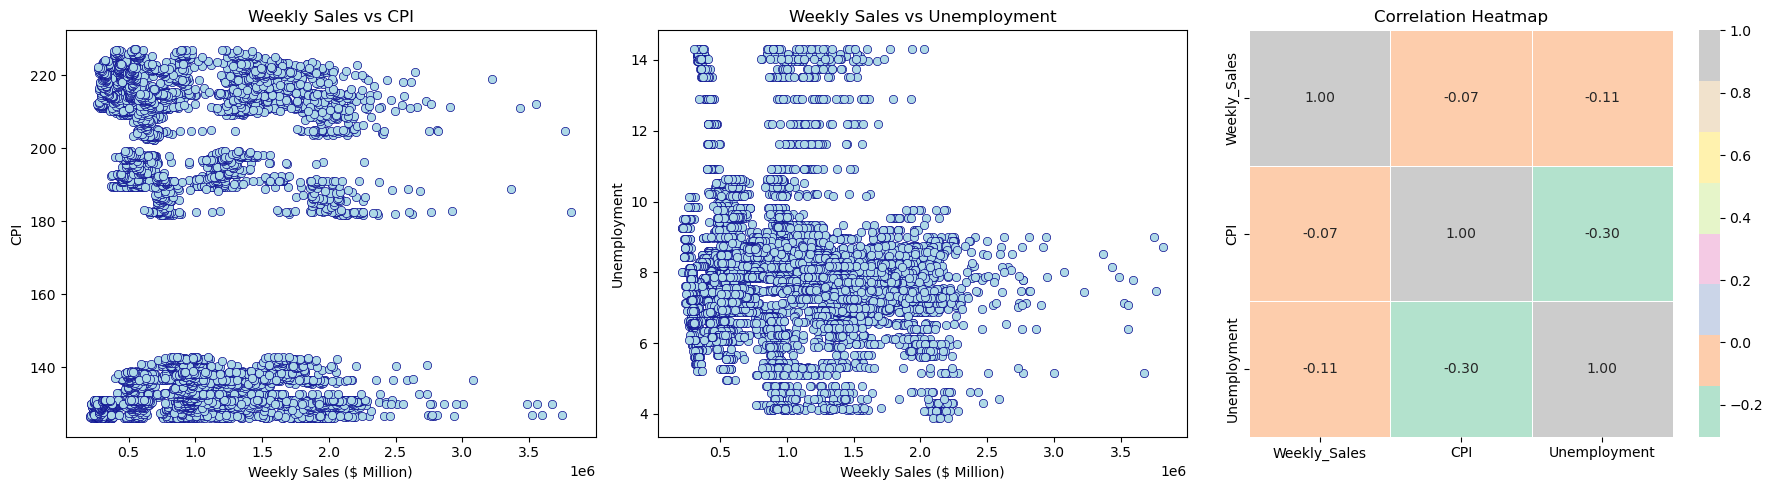

In [3]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Weekly Sales vs CPI
sns.scatterplot(data=data, x='Weekly_Sales', y='CPI', color='lightblue', edgecolor='darkblue', ax=axes[0])
axes[0].set_xlabel('Weekly Sales ($ Million)')
axes[0].set_ylabel('CPI')
axes[0].set_title('Weekly Sales vs CPI',fontsize=12, loc='center')

# Plot 2: Weekly Sales vs Unemployment
sns.scatterplot(data=data, x='Weekly_Sales', y='Unemployment', color='lightblue', edgecolor='darkblue', ax=axes[1])
axes[1].set_xlabel('Weekly Sales ($ Million)')
axes[1].set_ylabel('Unemployment')
axes[1].set_title('Weekly Sales vs Unemployment',fontsize=12, loc='center')

# Select a subset of data for the heatmap
walmart_data = data[['Weekly_Sales', 'CPI', 'Unemployment']]

# Plot 3: Correlation Heatmap
sns.heatmap(walmart_data.corr(), annot=True, cmap='Pastel2', fmt=".2f", linewidths=.5, ax=axes[2])
axes[2].set_title('Correlation Heatmap', fontsize=12, loc='center')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


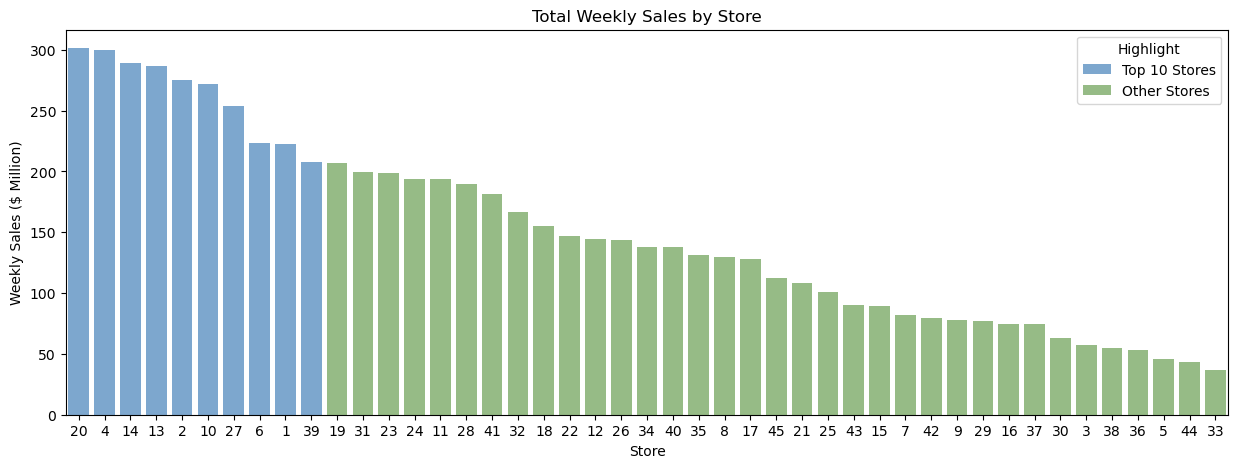

In [4]:
# Group by 'walmart store' and store the data in a pandas dataframe
store_sales = pd.DataFrame(data.groupby(['Store'])['Weekly_Sales'].sum()).reset_index()

# Sort the data by 'Weekly_Sales' in descending order
store_sales_sorted = store_sales.sort_values('Weekly_Sales', ascending=False)

top_10_stores = store_sales_sorted['Store'].head(10) #get the top 10 stores
top_3_stores = store_sales_sorted['Store'].head(3) #get the top 3 stores

# Create a new column to use for the hue
store_sales_sorted['Highlight'] = store_sales_sorted['Store'].apply(
    lambda store: 'Top 10 Stores' if store in top_10_stores.values 
    else 'Other Stores'
)

plt.figure(figsize=(15,5)) # modify graph size
sns.barplot(data=store_sales_sorted, 
            x='Store', 
            y='Weekly_Sales',
            hue = 'Highlight',
            order = store_sales.sort_values('Weekly_Sales',ascending = False).Store, # order by weekly sales
            palette={'Top 10 Stores': '#6fa8dc', 'Other Stores': '#93c47d'},
            legend=True) # modify colors 

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales ($ Million)')
plt.show()

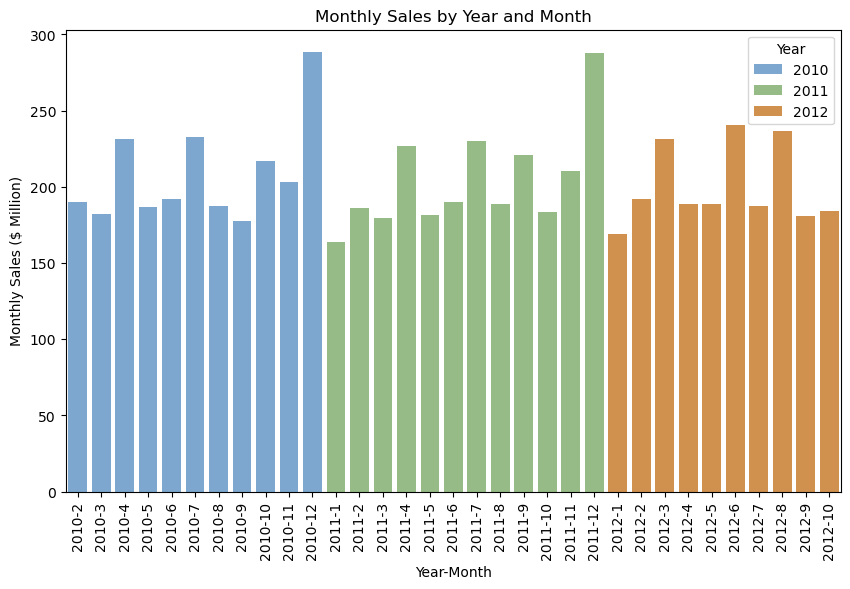

In [5]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Extract month and year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year

# Group by month and year and sum the weekly sales
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Create a column to combine year and month for plotting
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

# Create a custom color palette
custom_palette = {2010: '#6fa8dc',2011: '#93c47d',2012: '#e69138'}

# Generate the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='Year-Month', y='Weekly_Sales', hue='Year', palette=custom_palette)
plt.xticks(rotation=45)
plt.title('Monthly Sales by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Sales ($ Million)')

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()